1.Import Libraries

In [15]:
# --- Core Libraries ---
import pandas as pd
import numpy as np

# --- Visualization (optional but recommended) ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Machine Learning Tools ---
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    r2_score,
    mean_absolute_error,
    mean_squared_error
)


2.Upload the file

In [6]:
from google.colab import files
uploaded = files.upload()   # choose household_power_consumption.txt


Saving household_power_consumption.txt to household_power_consumption.txt


3. Load the dataset

In [7]:
df = pd.read_csv("household_power_consumption.txt",
                 sep=";",
                 na_values="?",
                 low_memory=False)

print("✅ Dataset Loaded")
df.head()


✅ Dataset Loaded


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


4.Data Cleaning

In [8]:
df.dropna(inplace=True)
print("✅ Missing values removed")


✅ Missing values removed


5.Data Preprocessing

In [9]:
df['Datetime'] = pd.to_datetime(df['Date'] + " " + df['Time'], format="%d/%m/%Y %H:%M:%S")

df.drop(columns=['Date', 'Time'], inplace=True)

for col in df.columns:
    if col != 'Datetime':
        df[col] = pd.to_numeric(df[col], errors='coerce')

df.dropna(subset=['Datetime'], inplace=True)
df.set_index('Datetime', inplace=True)
df.sort_index(inplace=True)

print("✅ Preprocessing completed")
df.head()


✅ Preprocessing completed


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [10]:
print("📋 Column names in the dataset:\n")
print(df.columns.tolist())


📋 Column names in the dataset:

['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']


6.Define Features & Target


In [11]:
X = df[['Global_reactive_power', 'Voltage', 'Global_intensity',
        'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
y = df['Global_active_power']

7.Split the data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"\nTraining samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")



Training samples: 1639424, Testing samples: 409856


8.Train Linear Regression Model

In [16]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

9.Predict using Linear Regression

In [17]:
y_pred_lr = lr_model.predict(X_test)


10.Compare Predictions with Actual Values

In [18]:
comparison_lr = pd.DataFrame({
    'Actual': y_test.values[:10],
    'Predicted': y_pred_lr[:10]
})
print("\nComparison of Actual vs Predicted (first 10 samples) - Linear Regression:")
print(comparison_lr)


Comparison of Actual vs Predicted (first 10 samples) - Linear Regression:
   Actual  Predicted
0   1.502   1.545277
1   0.374   0.400589
2   0.620   0.657363
3   0.280   0.273956
4   1.372   1.375195
5   0.284   0.337547
6   0.196   0.195701
7   2.234   2.243883
8   0.486   0.490165
9   1.842   1.799893


11.Calculate Accuracy (R² Score)

In [19]:
r2_lr = r2_score(y_test, y_pred_lr)
print(f"\nLinear Regression R² Score: {r2_lr:.4f}")


Linear Regression R² Score: 0.9986


 12.1 Visualize Actual vs Predicted

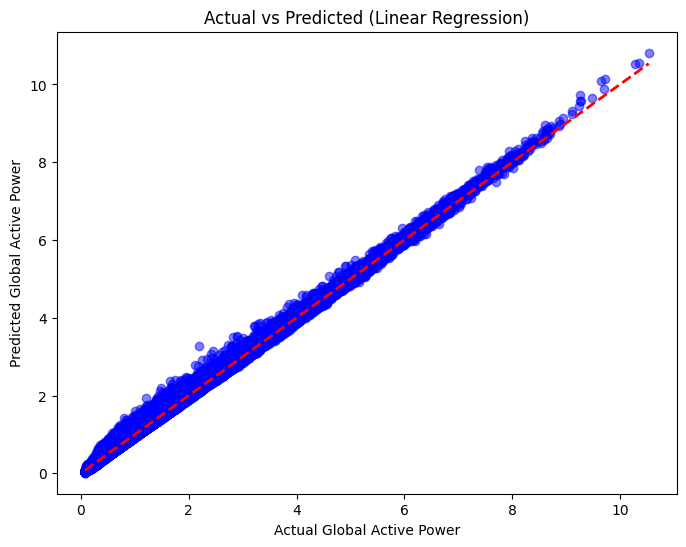

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Global Active Power')
plt.ylabel('Predicted Global Active Power')
plt.title('Actual vs Predicted (Linear Regression)')
plt.show()


12.2 Residual Analysis

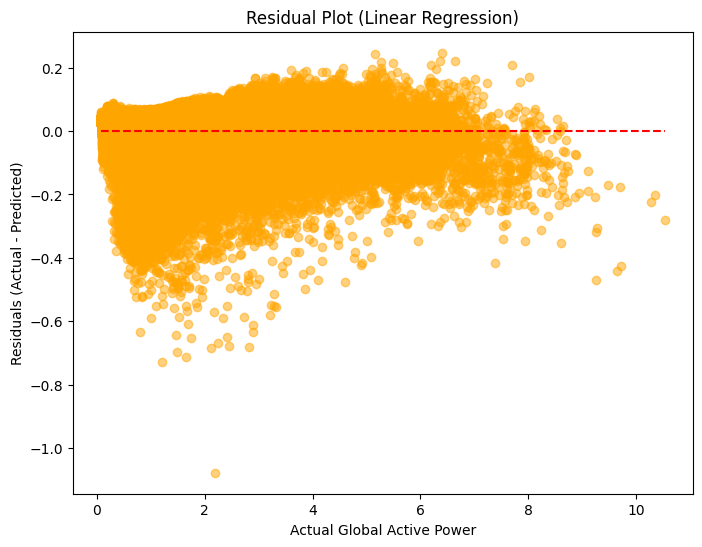

In [21]:
residuals = y_test - y_pred_lr
plt.figure(figsize=(8,6))
plt.scatter(y_test, residuals, alpha=0.5, color='orange')
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='red', linestyles='dashed')
plt.xlabel('Actual Global Active Power')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot (Linear Regression)')
plt.show()